<a href="https://colab.research.google.com/github/LeraDoroshenko/mn/blob/main/%D0%BB%D0%B0%D0%B13_2_%D0%94%D0%BE%D1%80%D0%BE%D1%88%D0%B5%D0%BD%D0%BA%D0%BE_%D0%92_4_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Завантажити датасет California Housing Dataset, що містить інформацію про житло в Каліфорнії. Вивести перших 5 рядків.**

In [5]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

california_data = fetch_california_housing(as_frame=True)
df = california_data.frame

print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


**1. Перевірити наявність пропусків. У разі виявлення замінити на середнє значення**

In [6]:
missing_values = df.isnull().sum()

df.fillna(df.mean(), inplace=True)

**2. Перевірити наявність дублікатів, при виявленні – видалити**

In [3]:
duplicates = df.duplicated().sum()

df.drop_duplicates(inplace=True)

**3. Перевірити тип даних. При необхідності замінити тип даних на числовий**

In [7]:
print(df.dtypes)

df = df.apply(pd.to_numeric, errors='coerce')

MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object


**4. Обчислити кореляцію. Розташувати в порядку спадання. Побудувати теплову карту кореляції.**

MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64


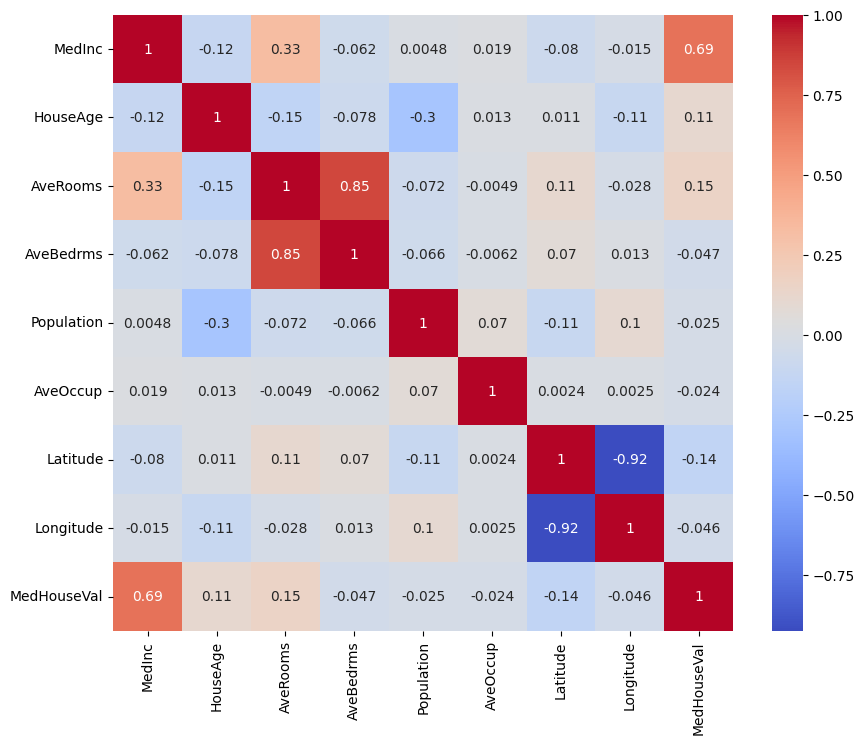

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

correlations_target = correlation_matrix["MedHouseVal"].sort_values(ascending=False)

print(correlations_target)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

**5. Масштабувати ознаки**

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('MedHouseVal', axis=1))

df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_scaled['MedHouseVal'] = df['MedHouseVal']

**6. Поділити дані на тренувальні і тестові**

In [10]:
from sklearn.model_selection import train_test_split

X = df_scaled.drop('MedHouseVal', axis=1)
y = df_scaled['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**7. Побудувати 3 моделі: лін. Регресія, регресія випадковий ліс, Ridge. Підібрати оптимальні параметри за допомогою GridSeach.**

In [11]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

rf_reg = RandomForestRegressor()
param_grid_rf = {'n_estimators': [50, 100, 200]}
grid_search_rf = GridSearchCV(rf_reg, param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)

ridge_reg = Ridge()
param_grid_ridge = {'alpha': [0.1, 1, 10]}
grid_search_ridge = GridSearchCV(ridge_reg, param_grid_ridge, cv=5)
grid_search_ridge.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0.1, 1, 10]})

**8. Вивести R² і MSE**

In [12]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred_linear = linear_reg.predict(X_test)
r2_linear = r2_score(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)

y_pred_rf = grid_search_rf.best_estimator_.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

y_pred_ridge = grid_search_ridge.best_estimator_.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print(f"Linear Regression - R²: {r2_linear}, MSE: {mse_linear}")
print(f"Random Forest - R²: {r2_rf}, MSE: {mse_rf}")
print(f"Ridge Regression - R²: {r2_ridge}, MSE: {mse_ridge}")

Linear Regression - R²: 0.575787706032451, MSE: 0.5558915986952441
Random Forest - R²: 0.807105382895142, MSE: 0.2527708381085466
Ridge Regression - R²: 0.5757907979394906, MSE: 0.5558875470324994


**9. Побудувати графіки**

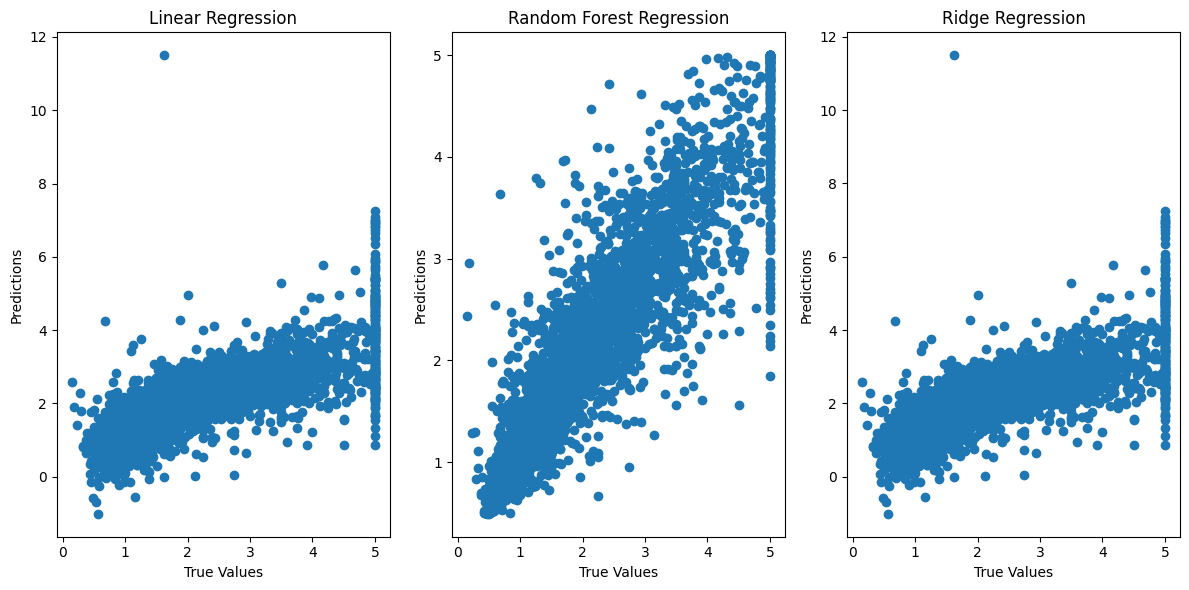

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_linear)
plt.title('Linear Regression')
plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_rf)
plt.title('Random Forest Regression')
plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_ridge)
plt.title('Ridge Regression')
plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.tight_layout()
plt.show()

**10. Написати ВИСНОВКИ**

Виконуючи дане завдання, були проаналізовані дані датасету California Housing, а точніше, пропуски замінені на середні значення, у разі наявності, дублікати були видалені. Також, на основі масштабованих та поділених на тренувальну та тестову вибірки даних, були створені різноманітні моделі та графіки, завдяки яким можна визначити найкращий метод для прогнозування вартості житла в Каліфорнії.